<a href="https://colab.research.google.com/github/Alanazi433/GenAI/blob/main/GenAI/HW1/Problem1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Test Point Classifications:
Point (-20, -40): Land
Point (20, 75): Land
Point (50, 50): Coastline
Point (-30, 160): Land
Point (80, -170): Sea
Point (-55, 150): Sea
Point (-15, -30): Land
Point (60, 15): Coastline
Point (25, 65): Coastline
Point (-5, 135): Land


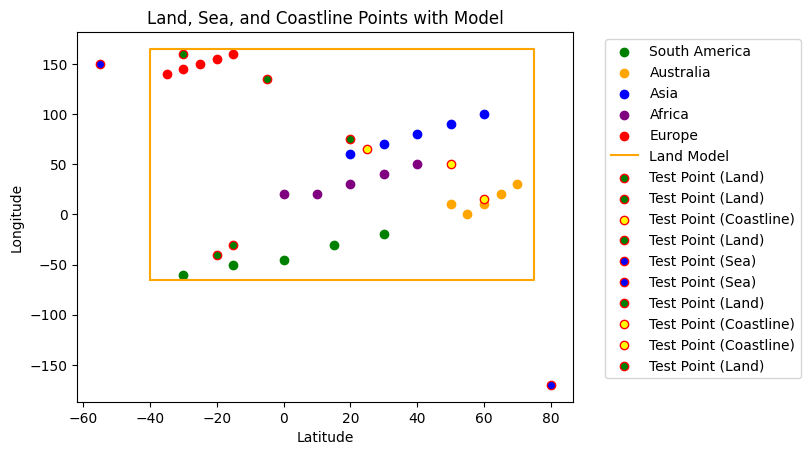

In [1]:
# Husam Alanazi
# Generative Ai


# Importing Libraries

# Numerical operations
import numpy as np

# Used for plotting
import matplotlib.pyplot as plt

# Used for calculating distances
from scipy.spatial import distance

# Defining Known Land Mass Points

# A dictionary where each key is a continent and the value is a list of tuples
# representing points on that continent.
land_points = {
    'South America': [(-30, -60), (-15, -50), (0, -45), (15, -30), (30, -20)],
    'Australia': [(50, 10), (55, 0), (60, 10), (65, 20), (70, 30)],
    'Asia': [(20, 60), (30, 70), (40, 80), (50, 90), (60, 100)],
    'Africa': [(0, 20), (10, 20), (20, 30), (30, 40), (40, 50)],
    'Europe': [(-35, 140), (-30, 145), (-25, 150), (-20, 155), (-15, 160)]
}

# Defining a Grid of Points

# Create a grid of points with latitude ranging from -90 to 90 and longitude
# from -180 to 180 in steps of 10.
grid_points = [(x, y) for x in range(-90, 91, 10) for y in range(-180, 181, 10)]

# Calculating Prior Probabilities

# This function calculates the prior probabilities of a point being land or sea based on
# the number of land points versus the total points.
def calculate_prior_probabilities(land_points, total_points):
    P_land = sum(len(points) for points in land_points.values()) / total_points
    P_sea = 1 - P_land
    return P_land, P_sea

# Calculating Likelihoods

# This function calculates the likelihoods of points being land or sea based on their distances
# to the nearest land point. The likelihood decreases exponentially with increasing distance from land.
def calculate_likelihoods(grid_points, land_points):
    likelihoods_land = {}
    likelihoods_sea = {}
    all_land_points = [point for points in land_points.values() for point in points]
    for point in grid_points:
        distances_to_land = distance.cdist([point], all_land_points, 'euclidean').min()
        likelihoods_land[point] = np.exp(-distances_to_land)  # Exponential decay
        likelihoods_sea[point] = 1 - likelihoods_land[point]  # Opposite of land
    return likelihoods_land, likelihoods_sea

# Classifying Points

# This function classifies a point as "Land", "Sea", or "Coastline" based on the defined model box
# and the proximity to land points within a specified distance threshold.
def classify_point(point, box_bounds, land_points, coastline_threshold=10):
    x_min, x_max, y_min, y_max = box_bounds
    all_land_points = [point for points in land_points.values() for point in points]

    # Calculate distance to the nearest land point
    distances_to_land = distance.cdist([point], all_land_points, 'euclidean').min()

    # Classify as Coastline if within the threshold distance from any land point
    if distances_to_land <= coastline_threshold:
        return 'Coastline'
    elif x_min <= point[0] <= x_max and y_min <= point[1] <= y_max:
        return 'Land'
    else:
        return 'Sea'

# Plotting the Points and Model

# This function plots the land points, test points, and the bounding box of
# the land model on a 2D plot, including the new "Coastline" category.
def plot_points(land_points, test_points, test_classifications, box_bounds):
    fig, ax = plt.subplots()

    # Define colors for each continent
    continent_colors = {
        'South America': 'green',
        'Europe': 'red',
        'Asia': 'blue',
        'Africa': 'purple',
        'Australia': 'orange'
    }

    # Plot land points by continent
    for continent, points in land_points.items():
        land_x, land_y = zip(*points)
        ax.scatter(land_x, land_y, color=continent_colors[continent], label=f'{continent}')

    # Highlight land model with an orange box
    x_min, x_max, y_min, y_max = box_bounds
    land_model_x = [x_min, x_max, x_max, x_min, x_min]
    land_model_y = [y_min, y_min, y_max, y_max, y_min]
    ax.plot(land_model_x, land_model_y, color='orange', label='Land Model')

    # Plot test points
    for point, classification in zip(test_points, test_classifications):
        if classification == 'Land':
            color = 'green'
        elif classification == 'Coastline':
            color = 'yellow'
        else:
            color = 'blue'
        ax.scatter(point[0], point[1], color=color, edgecolors='red', label=f'Test Point ({classification})')

    # Place the legend outside the plot box
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xlabel('Latitude')
    plt.ylabel('Longitude')
    plt.title('Land, Sea, and Coastline Points with Model')
    plt.grid(False)  # Remove grid
    plt.show()

# Main Execution

# Total points in the grid
total_points = len(grid_points)

# Calculate prior probabilities
P_land, P_sea = calculate_prior_probabilities(land_points, total_points)

# Calculate likelihoods
likelihoods_land, likelihoods_sea = calculate_likelihoods(grid_points, land_points)

# Define the bounds of the model box
all_land_x = [point[0] for points in land_points.values() for point in points]
all_land_y = [point[1] for points in land_points.values() for point in points]
x_min, x_max = min(all_land_x) - 5, max(all_land_x) + 5
y_min, y_max = min(all_land_y) - 5, max(all_land_y) + 5
box_bounds = (x_min, x_max, y_min, y_max)

# Define a new set of test points including points close to land masses
test_points = [
    (-20, -40), (20, 75), (50, 50), (-30, 160), (80, -170), (-55, 150),
    (-15, -30), (60, 15), (25, 65), (-5, 135)  # Added points near land masses
]

# Classify test points with the new "Coastline" category
test_classifications = [classify_point(point, box_bounds, land_points, coastline_threshold=10) for point in test_points]

# Print test point classifications
print("\nTest Point Classifications:")
for point, classification in zip(test_points, test_classifications):
    print(f"Point {point}: {classification}")

# Plot the points and the model
plot_points(land_points, test_points, test_classifications, box_bounds)
